In [1]:
'''basic libraries that we used in assignment'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [84]:
# dataset
df = pd.read_csv('gdp growth.csv')

'''choose for clustering because its very long dataset but we only choose two years for clustering'''
# df.loc[df.index.isin(['Australia','Belgium'])]
a = df.loc[df['Country Name'] == 'Greece']
b = df.loc[df['Country Name'] == 'Indonesia']
c = pd.concat([a,b])
data = c.iloc[:,5:-1]
transformData = np.transpose(data)
transformData.columns = ['col1', 'col2']
transformDatawithoutNull = transformData.dropna()
# make arrary
X = transformDatawithoutNull.values


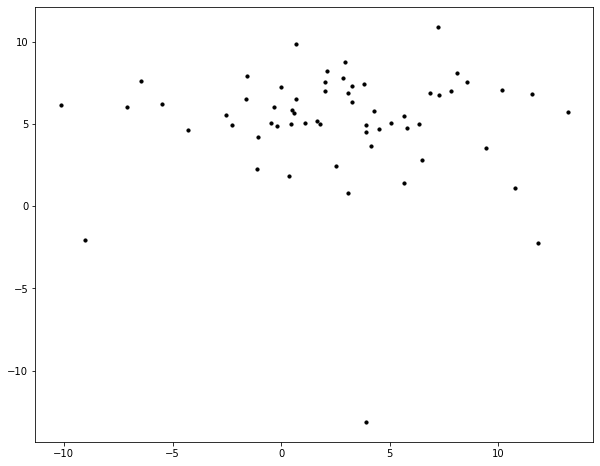

In [85]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1], s=10, c="black")
plt.show()

In [58]:
'''desribe the choosen dataset'''
transformDatawithoutNull.describe()

,89,106
count,60.000000,60.000000
mean,2.627516,5.131592
std,4.948124,3.434743
min,-10.149315,-13.126725
25%,-0.049022,4.682127
50%,2.901565,5.716609
75%,5.700747,6.987645
max,13.203841,10.915179


In [60]:
# normalizing the dataset

from sklearn import preprocessing

'''normalization id done by sklearn preprocessing'''
normalized = preprocessing.normalize(X)


E:\Files\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


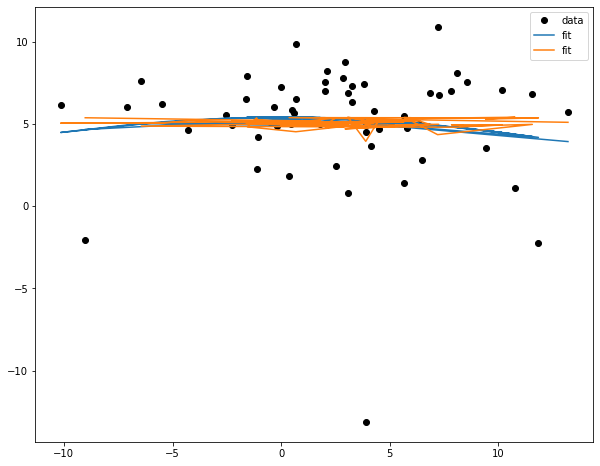

In [81]:

'''fitting the dataset using curve fit '''
from scipy.optimize import curve_fit

'''split in x and y'''

x = transformDatawithoutNull["col1"]
y = transformDatawithoutNull["col2"]

def Guass(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y
    
'''that above function is guassian function that is for fit the model using curve_fit'''
parameters, cov = curve_fit(Guass,x, y)

fitA = parameters[0]
fitB = parameters[1]

fity = temp(X, fitA, fitB)

#     plotting
plt.figure(figsize=(10,8))
plt.plot(x, y,'o', label='data', color="black")
plt.plot(x, fit_y, '-', label='fit')
plt.legend()
plt.show()

In [76]:
# prediction for future values
from sklearn.cluster import KMeans

'''elbow method is used for finding possible numbers of clusters'''
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

E:\Files\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


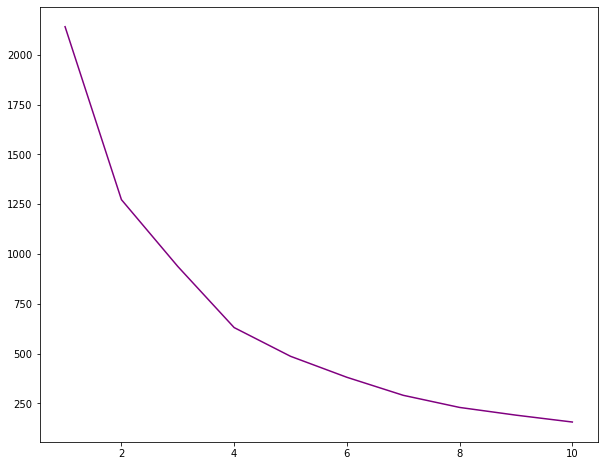

In [77]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss, color = "purple")
plt.show()

In [78]:
kmeans = KMeans(n_clusters = 8, init = "k-means++")

# fit and predict
y_kmeans = kmeans.fit_predict(X)

y_kmeans

array([4, 5, 6, 4, 6, 1, 1, 4, 4, 4, 4, 4, 4, 2, 1, 4, 0, 4, 0, 0, 5, 5,
       5, 0, 1, 5, 5, 1, 0, 5, 0, 5, 5, 0, 0, 0, 1, 3, 1, 1, 1, 1, 1, 1,
       5, 1, 0, 5, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 7])

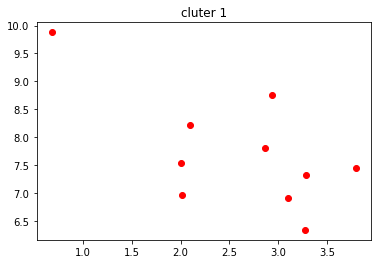

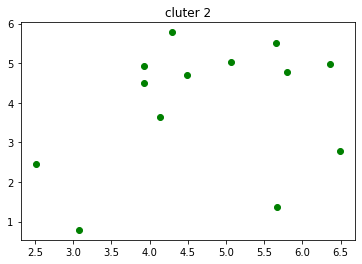

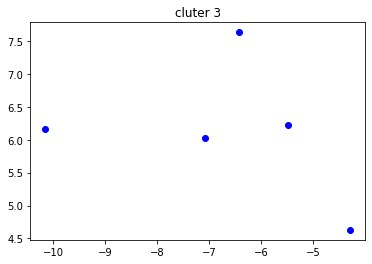

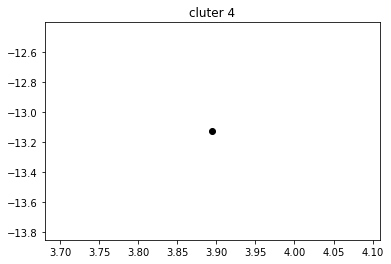

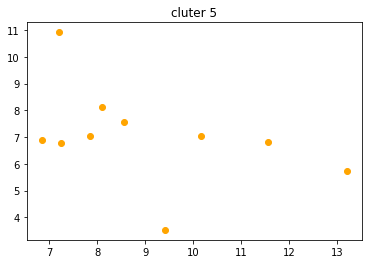

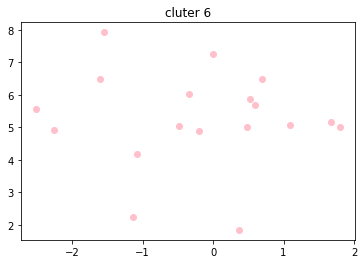

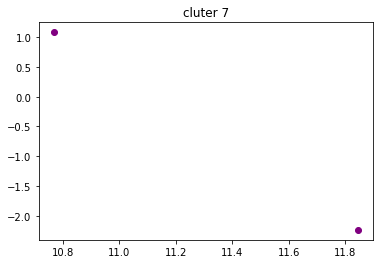

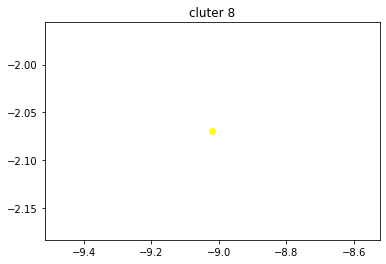

In [82]:
'''according to above prediction we make different visualization to check which cluster contains more elements
   all of the 8 cluster is infornt of you and we visualize all cluster seprately'''

c = ["red","green", "blue","black","orange","pink","purple","yellow"]
for i in range(8):
    string = f"cluter {i+1}"
    plt.title(string)
    plt.scatter(X[y_kmeans==i,0], X[y_kmeans==i,1], color=c[i])
    plt.show()

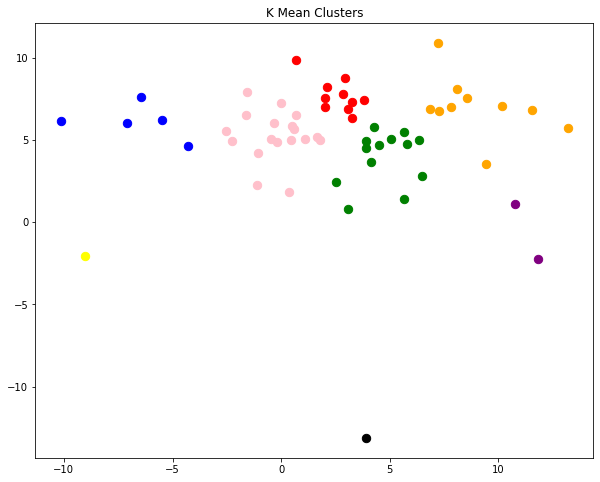

In [83]:
'''here we finally make all the clusters couple togeather and visualize using matplot scatter plotting
all the clusters easy visualize in single plot'''
plt.figure(figsize=(10,8))
plt.title("K Mean Clusters")
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=70, c="red")
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=70, c="green")
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=70, c="blue")
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=70, c="black")
plt.scatter(X[y_kmeans==4,0], X[y_kmeans==4,1], s=70, c="orange")
plt.scatter(X[y_kmeans==5,0], X[y_kmeans==5,1], s=70, c="pink")
plt.scatter(X[y_kmeans==6,0], X[y_kmeans==6,1], s=70, c="purple")
plt.scatter(X[y_kmeans==7,0], X[y_kmeans==7,1], s=70, c="yellow")
plt.show()